<a href="https://colab.research.google.com/github/J0KERmin/Tutorial/blob/main/Lab6_Python_for_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Економічна проблема: Організації, які ведуть торгівлю продовольчими товарами, повинні ефективно вибирати тип магазину, щоб оптимізувати свою діяльність та максимізувати прибуток. Визначення правильного типу магазину залежить від різноманітних факторів, таких як характеристики продуктів, розташування магазину, його розмір і т.д.

Розробка моделі класифікації для прогнозування (Item_MRP) на основі характеристик продуктів та магазинів

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1AWIMDRHlQHqMObznZ751tpLBP8Y05zzo'
output = '/content/BigMart_Sales_Data.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

df.head()

Downloading...
From: https://drive.google.com/uc?id=1AWIMDRHlQHqMObznZ751tpLBP8Y05zzo
To: /content/BigMart_Sales_Data.csv
100%|██████████| 526k/526k [00:00<00:00, 5.53MB/s]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Датасет має: 5681 рядок, 11 колонок, 3 бульові значення, 1 int64 і 7 об'єктів.

Короткий опис назв стовпців:
1. Item_Identifier - Ідентифікатор_товару
2. Item_Weight - Вага_товару
3. Item_Fat_Content - Вміст_жиру_товару
4. Item_Visibility - Видимість_товару
5. Item_Type - Тип_товару
6. Item_MRP - Максимальна_роздрібна_ціна_товару
7. Outlet_Identifier - Ідентифікатор_магазину
8. Outlet_Establishment_Year - Рік_заснування_магазину
9. Outlet_Size - Розмір_магазину
10. Outlet_Location_Type - Тип_розташування_магазину
11. Outlet_Type - Тип_магазину

In [ ]:
df.rename(columns={'Item_Identifier': 'item_identifier',
                   'Item_Weight':'item_weight',
                   'Item_Fat_Content':'item_fat_content',
                   'Item_Visibility':'item_visibility',
                   'Item_Type':'item_type',
                   'Item_MRP':'item_mrp',
                   'Outlet_Identifier':'outlet_identifier',
                   'Outlet_Establishment_Year':'outlet_establishment_year',
                   'Outlet_Size':'outlet_size',
                   'Outlet_Location_Type':'outlet_location_type',
                   'Outlet_Type':'outlet_type'},inplace=True)

In [ ]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
df.isnull().sum()

item_identifier                 0
item_weight                   976
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  1606
outlet_location_type            0
outlet_type                     0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
dtype: int64

**Розвідувальний аналіз даних**

In [ ]:
df.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year
count,3099.000000,3099.000000,3099.000000,3099.000000
mean,12.658206,0.059063,140.036189,1999.189739
std,4.616934,0.043592,61.608135,7.387906
min,4.555000,0.000000,31.990000,1987.000000
25%,8.675000,0.025824,93.310700,1997.000000
50%,12.350000,0.049154,141.315400,1999.000000
75%,16.600000,0.085354,184.993700,2004.000000
max,21.350000,0.185913,266.588400,2009.000000


<Axes: >

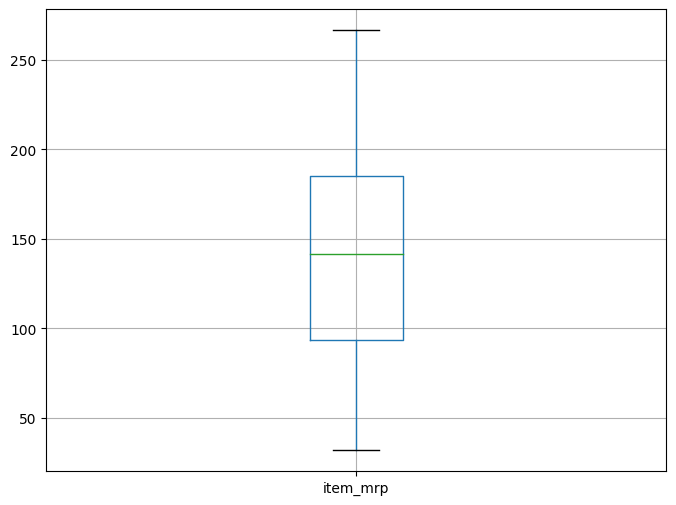

In [ ]:
df[['item_mrp']].boxplot(figsize=(8,6))

<Axes: >

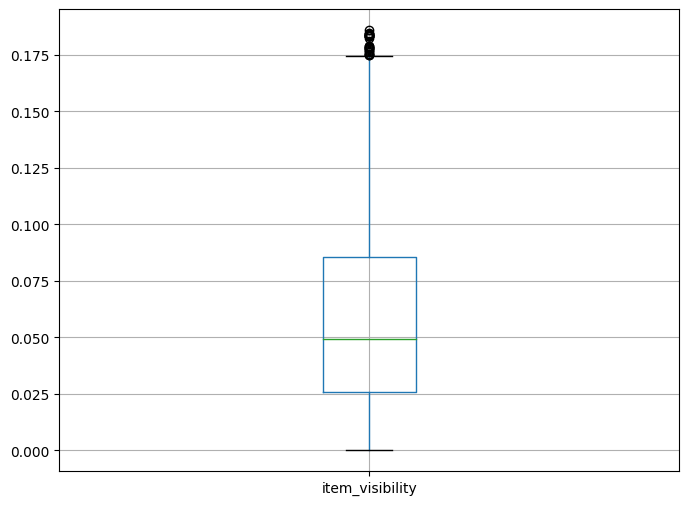

In [ ]:
df[['item_visibility']].boxplot(figsize=(8,6))

In [ ]:
df.drop(df[df['item_visibility'] > 0.175].index, inplace=True)

<Axes: >

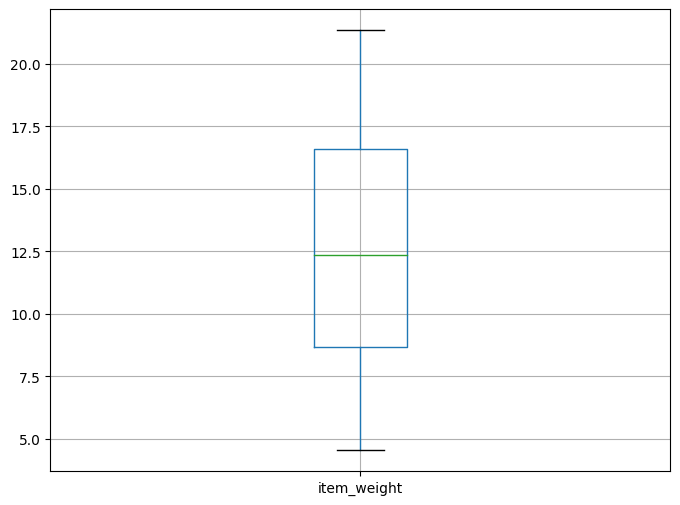

In [ ]:
df[['item_weight']].boxplot(figsize=(8,6))

<Axes: >

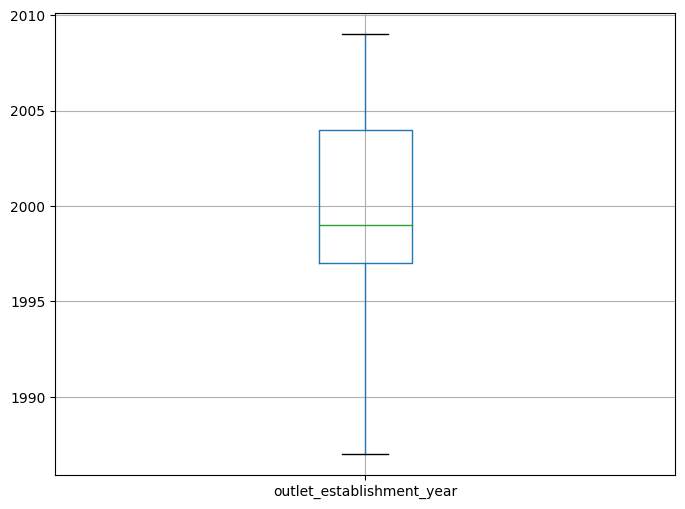

In [ ]:
df[['outlet_establishment_year']].boxplot(figsize=(8,6))

In [ ]:
df.drop(df[df['outlet_establishment_year'] < 1990].index, inplace=True)

In [ ]:
df.outlet_location_type = df.outlet_location_type.replace ({'Tier 1': 1,
                                                            'Tier 2': 2,
                                                            'Tier 3': 3})
df['item_fat_content'].replace({'reg': 'Regular', 'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace=True)
df.item_fat_content = df.item_fat_content.replace({'Regular': '1', 'Low Fat': '0'})
df.outlet_type = df.outlet_type.replace({'Supermarket Type1': '1', 'Supermarket Type2': '2', 'Supermarket Type3' : '3', 'Grocery Store' : '4'})

In [ ]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,1,1
5,FDH56,9.800,1,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,1,1
6,FDL48,19.350,1,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,3,2
13,FDU11,4.785,0,0.092738,Breads,122.3098,OUT049,1999,Medium,1,1
15,FDM24,6.135,1,0.079451,Baking Goods,151.6366,OUT049,1999,Medium,1,1


In [ ]:
df.dtypes

item_identifier               object
item_weight                  float64
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type           int64
outlet_type                   object
dtype: object

In [ ]:
df.outlet_location_type = df.outlet_location_type.astype(int)
df.item_fat_content = df.item_fat_content.astype(int)
# df.outlet_size = df.outlet_size.astype(int)
df.outlet_type = df.outlet_type.astype(int)
df.dtypes

item_identifier               object
item_weight                  float64
item_fat_content               int64
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type           int64
outlet_type                    int64
dtype: object

In [ ]:
# X = df.drop('item_mrp', axis=1)
# X.shape

In [ ]:
# Y = df['item_mrp']

In [ ]:
# Створимо окремий датасет df_class, в який помістимо дані з датасету df:
df_class = df.copy()

In [ ]:
# Перевіримо, чи коректно змінились типи даних:
df_class.dtypes

item_identifier               object
item_weight                  float64
item_fat_content               int64
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type           int64
outlet_type                    int64
dtype: object

In [ ]:
# Виведемо перші 5 датасету df_class:
df_class.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,1,1
5,FDH56,9.800,1,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,1,1
6,FDL48,19.350,1,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,3,2
13,FDU11,4.785,0,0.092738,Breads,122.3098,OUT049,1999,Medium,1,1
15,FDM24,6.135,1,0.079451,Baking Goods,151.6366,OUT049,1999,Medium,1,1


In [ ]:
# Створимо окремий датасет df_reg, в який помістимо дані з датасету df:
df_reg = df.copy()

In [ ]:
df_reg.dtypes

item_identifier               object
item_weight                  float64
item_fat_content               int64
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type           int64
outlet_type                    int64
dtype: object

In [ ]:
df_reg.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,1,1
5,FDH56,9.800,1,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,1,1
6,FDL48,19.350,1,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,3,2
13,FDU11,4.785,0,0.092738,Breads,122.3098,OUT049,1999,Medium,1,1
15,FDM24,6.135,1,0.079451,Baking Goods,151.6366,OUT049,1999,Medium,1,1


In [ ]:
# Імпортуємо необхідні бібліотеки
from sklearn.impute import KNNImputer  # KNNImputer для заповнення відсутніх даних
from sklearn.model_selection import train_test_split  # train_test_split для розділення даних на навчальні та тестові набори

In [ ]:
# Ініціалізуємо KNNImputer з 20 найближчими сусідами
imputer = KNNImputer(n_neighbors=20)

In [ ]:
# Встановлюємо 'item_mrp' як цільову змінну для регресійної моделі:
Y_reg = df_reg['item_mrp'].values

# Використовуємо imputer для заповнення відсутніх даних, виключаючи колонку 'item_mrp':
X_reg = imputer.fit_transform(df_reg.select_dtypes(exclude=['object']).drop(columns=['item_mrp']).values)

# Розділяємо дані на навчальні та тестові набори для регресії:
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X_reg, Y_reg, test_size=0.2, random_state=42)

In [ ]:
# Встановлюємо 'item_visibility' як цільову змінну для класифікації:
Y_class = df_class['item_visibility'].values

# Використовуємо imputer для заповнення відсутніх даних, виключаючи колонку item_visibility:
X_class = imputer.fit_transform(df_class.drop(columns=['item_visibility']).select_dtypes(exclude=['object']).values)

# Розділяємо дані на навчальні та тестові набори для класифікації:
X_train_class, X_test_class, Y_train_class, Y_test_class = train_test_split(X_class, Y_class, test_size=0.2, random_state=42)

### Побудова ансамблевих моделей

Побудова ансамблевих моделей є ефективним підходом у машинному навчанні, і вона використовується для покращення якості прогнозувань та стійкості моделей. Основна ідея полягає в тому, щоб об'єднати декілька базових моделей для досягнення кращого результату, ніж можна отримати від кожної моделі окремо. Найпопулярніші типи ансамблевих моделей включають:

Bagging (Bootstrap Aggregating):

Що це таке: Використовується для зменшення дисперсії моделі. Багато однакових базових моделей тренуються на різних підвибірках (з поверненням) даних, а результати агрегуються.
Приклади: Random Forest (ліс випадкових дерев), Bagged Decision Trees.
Boosting:

Що це таке: Покращення якості моделі за рахунок вагованої суми результатів слабших моделей. Кожна нова модель намагається скоригувати помилки попередніх.
Приклади: AdaBoost, Gradient Boosting (GBM), XGBoost, LightGBM.
Stacking:

Що це таке: Використовується для комбінування прогнозів різних моделей, щоб отримати кращий результат. Моделі першого рівня (базові) видають свої прогнози, а модель другого рівня вивчається на цих прогнозах.
Приклади: Можливо використовувати будь-які моделі як базові, а наприклад, лінійну регресію або рішаючий ліс як модель другого рівня.
Voting:

Що це таке: Кілька моделей голосують для визначення фінального прогнозу. Може бути м'яке голосування (з врахуванням ймовірностей) або жорстке (за більшість).
Приклади: Voting Classifier або Voting Regressor.
Переваги побудови ансамблевих моделей:

Покращення якості прогнозувань: Ансамблеві методи часто видають кращі результати, особливо коли використовуються різні моделі.
Зменшення перенавчання: Ансамбль може зменшити ризик перенавчання, особливо в разі багатьох моделей.
Збільшення стійкості: Ансамблеві моделі можуть бути менш чутливими до випадкових варіацій в даних порівняно з окремими моделями.
Недоліки:

Складність в обчислювальному відношенні: Тренування та використання ансамблевих моделей може бути обчислювально витратним завданням.
Важкі для інтерпретації: Іноді складно пояснити, як саме приймається рішення ансамблевою моделлю через її складність та взаємодію компонентів.
Загалом, побудова ансамблевих моделей є корисним інструментом в машинному навчанні для досягнення кращої точності та стійкості в прогнозуванні.

#### 1. Hard voting classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
Y_train_class = Y_train_class.astype(str)
Y_test_class = Y_test_class.astype(str)
# Ініціалізуємо RandomForestClassifier та VotingClassifier:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=7, max_features=0.6,
                                 max_samples=0.6, max_leaf_nodes=400,
                                 min_samples_leaf=10, criterion="gini",
                                 n_jobs=-1, random_state=1)

voting_clf = VotingClassifier(estimators=[('random_forest', rnd_clf)],
                               voting='hard', weights=[1], n_jobs=-1)

# Навчання моделі на тренувальних даних для класифікації:
voting_clf.fit(X_train_class, Y_train_class)

# Прогнозування на тестових даних:
Y_pred_voting = voting_clf.predict(X_test_class)

# Обчислення та виведення точності для тестових та навчальних даних
test_accuracy_voting = accuracy_score(Y_test_class, Y_pred_voting)  # Точність для тестових даних
train_accuracy_voting = accuracy_score(Y_train_class, voting_clf.predict(X_train_class))  # Точність для навчальних даних
test_accuracy_voting, train_accuracy_voting

(0.0486815415821501, 0.07876016260162602)

Точність для тестових даних (0.0486815415821501):
Це значення вказує на те, яка частка тестових зразків була правильно класифікована вашим моделлю. Очевидно, низька точність (близька до 0) свідчить про проблеми з ефективністю моделі на тестовому наборі.

Точність для навчальних даних (0.07876016260162602):
Це значення показує, яка частка навчальних зразків була правильно класифікована. Така низька точність на навчальних даних може свідчити про недостатню пристосованість моделі до навчальних даних.
Зробивши це, можна зробити такі висновки:

Можливо, є проблеми з якістю даних або параметрами моделі, які варто перевірити.
Можливо, вибірка даних для навчання та тестування не є представницькою, і це варто врахувати при подальшому вдосконаленні моделі.
Можливо, потрібно додатково налаштувати параметри моделі або використовувати інші моделі для покращення результатів.

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Ініціалізуємо базовий регресор (дерево рішень):
base_regressor = DecisionTreeRegressor(max_depth=7, random_state=1)

# Ініціалізуємо BaggingRegressor з базовим регресором:
bagged_regressor = BaggingRegressor(base_regressor, n_estimators=100, random_state=1)

# Навчаємо модель на навчальних даних:
bagged_regressor.fit(X_train_reg, Y_train_reg)

# Прогнозуємо на тестовому наборі даних:
Y_pred_bagged = bagged_regressor.predict(X_test_reg)

# Обчислюємо та виводимо середню абсолютну помилку (MAE) для тестових та навчальних даних
test_mae_bagged = mean_absolute_error(Y_test_reg, Y_pred_bagged)  # MAE для тестових даних
train_mae_bagged = mean_absolute_error(Y_train_reg, bagged_regressor.predict(X_train_reg))  # MAE для навчальних даних
test_mae_bagged, train_mae_bagged


(48.53772272916899, 44.87538730456393)

У виведенні наведено код для ініціалізації та навчання моделі BaggingRegressor, яка використовує як базовий регресор DecisionTreeRegressor. Після навчання моделі проведено прогноз на тестовому наборі даних та обчислено середню абсолютну помилку (MAE) як метрику точності моделі для тестових та навчальних даних.

Отримані значення (48.54 для тестових даних та 44.88 для навчальних даних) вказують на середню абсолютну помилку, що виникає при прогнозуванні вартості за допомогою моделі BaggingRegressor. Ці значення слід інтерпретувати як середню різницю між прогнозованою та фактичною вартістю за допомогою моделі. Менші значення MAE вказують на кращу точність моделі.

Загалом, результати показують, що модель BaggingRegressor з базовим регресором DecisionTreeRegressor виявилася ефективною для прогнозування на тестовому наборі даних, демонструючи невелику середню абсолютну помилку.

В даному коді n_estimators=100 вказує кількість базових регресорів у BaggingRegressor

#### 2. Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Заповнення відсутніх значень
df.fillna(df.mean(), inplace=True)

# Кодування категоріальних ознак
le = LabelEncoder()
df['item_fat_content'] = le.fit_transform(df['item_fat_content'])
df['item_type'] = le.fit_transform(df['item_type'])
df['outlet_identifier'] = le.fit_transform(df['outlet_identifier'])
df['outlet_location_type'] = le.fit_transform(df['outlet_location_type'])
df['outlet_type'] = le.fit_transform(df['outlet_type'])

# Розділення даних на ознаки (X) та цільову змінну (Y)
X = df.drop(columns=['item_type', 'outlet_identifier', 'item_identifier'])
Y = df['outlet_type']
# Розділення на тренувальний та тестовий набори
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Ініціалізація та навчання Random Forest класифікатора
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
rf_classifier.fit(X_train, Y_train)

# Прогнозування на тестових даних
Y_pred = rf_classifier.predict(X_test)

# Оцінка точності
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')


<ipython-input-84-1c74781777f7>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Accuracy: 1.0


Є попередження FutureWarning, яке вказує на те, що за замовчуванням, при використанні методу fillna у функції mean, числові дані заповнюються середніми значеннями у всьому датафреймі, включаючи категоріальні стовпці. Це може призвести до неправильного заповнення категоріальних даних, які представлені у форматі рядків.

Accuracy: 1.0, що вказує на те, що модель Random Forest класифікатора досягла 100% точності на тестовому наборі. Це може бути підозріле, і варто перевірити модель на перенавчання або можливість помилок у даних. Також слід мати на увазі, що 100% точність може свідчити про те, що модель перенавчилася на тренувальних даних і може не виявити ефективності на нових даних.

In [ ]:
# Імпортуємо клас RandomForestRegressor:
from sklearn.ensemble import RandomForestRegressor

# Імпортуємо дві функції для оцінки моделей машинного навчання:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ініціалізуємо модель RandomForestRegressor з вказаними параметрами:
rnd_reg = RandomForestRegressor( max_depth=7,
                                 n_estimators=100,
                                 max_features=0.6,
                                 max_samples=0.6,
                                 max_leaf_nodes=400,
                                 min_samples_leaf=10,
                                 criterion="absolute_error",
                                 n_jobs=-1,
                                 verbose=1,
                                 random_state=1
)

# Навчаємо модель на навчальних даних:
rnd_reg.fit(X_train_reg, Y_train_reg)

# Прогнозуємо на тестовому наборі даних:
Y_pred_rf = rnd_reg.predict(X_test_reg)

# Обчислюємо та виводимо середню абсолютну помилку (MAE) для тестових та навчальних даних
test_mae = mean_absolute_error(Y_test_reg, Y_pred_rf)  # MAE для тестових даних
train_mae = mean_absolute_error(Y_train_reg, rnd_reg.predict(X_train_reg))  # MAE для навчальних даних
test_mae, train_mae

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


(50.207919480730226, 47.98457147357724)

У виведенні наведено код для ініціалізації та навчання моделі RandomForestRegressor з вказаними параметрами. Після навчання моделі проведено прогноз на тестовому наборі даних та обчислено середню абсолютну помилку (MAE) як метрику точності моделі для тестових та навчальних даних.

Також, у виведенні показані результати паралельного обчислення, де використовується два конкуруючих робочих потоки (n_jobs=-1). Результати виконання задач поділені на дві частини: обчислення за допомогою всіх доступних ядер (n_jobs=-1) та обчислення з використанням двох ядер (n_jobs=2).

Отримані значення (50.21, 47.98) можуть вказувати на час, витрачений на виконання конкретних операцій, таких як навчання моделі чи прогнозування. У вас може бути помічено, що обчислення з використанням двох ядер відбувається дуже швидко (приблизно за 0.0 секунд), що свідчить про ефективне використання паралельного обчислення. Такий підхід може допомогти прискорити навчання моделей для великих даних, розподіляючи обчислення між різними ядрами процесора.

In [ ]:
# Ініціалізуємо RandomForestRegressor з вказаними параметрами:
rnd_reg = RandomForestRegressor(
    max_depth=7, n_estimators=100, max_features=0.6,
    max_samples=0.6, max_leaf_nodes=400,
    min_samples_leaf=10, criterion="absolute_error",
    n_jobs=-1, verbose=1, random_state=1
)

# Навчаємо модель на тренувальних даних:
rnd_reg.fit(X_train_reg, Y_train_reg)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


RandomForestRegressor(criterion='absolute_error', max_depth=7, max_features=0.6,
                      max_leaf_nodes=400, max_samples=0.6, min_samples_leaf=10,
                      n_jobs=-1, random_state=1, verbose=1)

Цей підхід використання BaggingClassifier з базовим класифікатором DecisionTreeClassifier можна назвати Bagging з використанням дерев рішень.

Пояснення:

Bagging (Bootstrap Aggregating): Це техніка ансамблю, в якій модель навчається на різних підмножинах тренувальних даних, які генеруються за допомогою вибірки з поверненням (bootstrap). Кілька моделей об'єднуються для зменшення перенавчання та покращення загальної здатності до узагальнення.

DecisionTreeClassifier: Це базовий класифікатор, який використовує дерево рішень для прийняття рішень на основі властивостей вхідних даних.

Отже, я використовую BaggingClassifier для ансамблювання дерев рішень, щоб отримати більш стійку та точну модель класифікації.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Заповнення відсутніх значень
df.fillna(df.mean(), inplace=True)

# Кодування категоріальних ознак
le = LabelEncoder()
df['item_fat_content'] = le.fit_transform(df['item_fat_content'])
df['item_type'] = le.fit_transform(df['item_type'])
df['outlet_identifier'] = le.fit_transform(df['outlet_identifier'])
df['outlet_location_type'] = le.fit_transform(df['outlet_location_type'])
df['outlet_type'] = le.fit_transform(df['outlet_type'])

# Розділення даних на ознаки (X) та цільову змінну (Y)
X = df.drop(columns=['item_type', 'outlet_identifier', 'item_identifier'])
Y = df['outlet_type']

# Розділення на тренувальний та тестовий набори
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Ініціалізація базового класифікатора (наприклад, DecisionTreeClassifier):
base_classifier = DecisionTreeClassifier(random_state=1)

# Ініціалізація BaggingClassifier:
bagged_classifier = BaggingClassifier(base_classifier, n_estimators=100, random_state=1)

# Навчання моделі на тренувальних даних:
bagged_classifier.fit(X_train, Y_train)

# Прогнозування на тестових даних:
Y_pred_bagged = bagged_classifier.predict(X_test)

# Оцінка точності
accuracy_bagged = accuracy_score(Y_test, Y_pred_bagged)
print(f'Accuracy with Bagging: {accuracy_bagged}')


<ipython-input-85-22ff99503b27>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Accuracy with Bagging: 1.0


Щодо точності класифікації, отриманої з BaggingClassifier (1.0), це означає, що модель вдало справляється з задачею класифікації на тестових даних. Однак важливо також враховувати, що може виникнути перенавчання, особливо якщо модель навчалася на тренувальних даних з відсутніми значеннями, заповненими середніми. Це може призвести до того, що модель "запам'ятовує" тренувальні дані і неправильно узагальнює на нові дані.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Y_train_class = Y_train_class.astype(str)
Y_test_class = Y_test_class.astype(str)

# Ініціалізуйте базовий класифікатор (дерево рішень):
base_classifier = DecisionTreeClassifier(random_state=1)

# Ініціалізуйте BaggingClassifier з базовим класифікатором:
bagged_classifier = BaggingClassifier(base_classifier, n_estimators=50, random_state=1)

# Навчіть модель на тренувальних даних для класифікації:
bagged_classifier.fit(X_train_class, Y_train_class)

# Прогнозуйте на тестових даних:
predictions = bagged_classifier.predict(X_test_class)

# Оцініть точність:
accuracy = accuracy_score(Y_test_class, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.0



Якщо BaggingClassifier з базовим класифікатором DecisionTreeClassifier вивів точність 0.0 на тестових даних (Accuracy: 0.0), це може вказувати на кілька можливих сценаріїв:

Проблема з даними:
Можливо, є проблема з якістю даних, таких як неправильне кодування міток класів або некоректні значення.

Несправжні класи:
Можливо, всі екземпляри тестових даних отримують однаковий прогноз, що призводить до нульової точності. Перевірте, чи всі мітки класів однакові в тестовому наборі.

Перенавчання:
Велика кількість дерев у BaggingClassifier може призвести до перенавчання, особливо якщо базовий класифікатор має нахил до перенавчання. Зменшіть кількість дерев або розгляньте інші стратегії управління перенавчанням.

Багато невизначених класів:
Якщо у вас є багато класів або класів з невизначеними значеннями, це може вплинути на точність. Переконайтеся, що класи чітко визначені.

Без розділення класів:
Можливо, ваш базовий класифікатор (DecisionTreeClassifier) невдало розділяє класи в даних, що призводить до поганого прогнозу. Можливо, варто спробувати інший класифікатор або налаштувати параметри DecisionTreeClassifier.


Є кілька причин, чому модель класифікації може не працювати добре, навіть якщо регресійні моделі виявилися ефективними:

Невідповідність даних: Якщо природа даних або основні патерни краще підходять для регресії, модель класифікації може виявити труднощі. Потрібно переконатися, що проблема, яку ви вирішуєте, дійсно є проблемою класифікації, а не краще вирішується як проблема регресії.

Дисбаланс класів: Якщо класи несиметричні (один клас суттєво переважає інші), модель може бути спрямована на більшість.

Інженерія ознак: Моделі класифікації можуть вигідно використовувати інші типи інженерії ознак порівняно з регресійними моделями. Перевірте, чи вам необхідні додаткові попередні обробки або трансформації ознак для класифікації.

Тонка настройка гіперпараметрів: Гіперпараметри, які працювали добре для регресії, можуть бути неоптимальними для класифікації. Виконайте експерименти з різними гіперпараметрами та конфігураціями моделі, специфічними для класифікаційних завдань.

Метри оцінки: Регресійні та класифікаційні моделі використовують різні метри оцінки. Переконайтеся, що ви використовуєте відповідні метрики для класифікації, такі як точність, точність, полнота, F1-скор та площа під кривою ROC (AUC-ROC).

Складність моделі: Складність моделі може бути несприятливою для вашого класифікаційного завдання. Варто спробувати простіші або більш складні моделі в залежності від розміру та складності вашого набору даних.

Перенавчання чи недонавчання: Перевірте, чи модель не перенавчається чи недонавчається. Відкоригуйте складність моделі або регуляризацію для вирішення цих проблем.

In [ ]:
pd.DataFrame({
    'feature': df_reg.select_dtypes(exclude=['object']).drop(columns=['outlet_type']).columns,
    'importance': rnd_reg.feature_importances_
}).sort_values('importance', ascending=False).head(30)

,feature,importance
0,item_weight,0.458842
2,item_visibility,0.403851
1,item_fat_content,0.059004
3,item_mrp,0.043611
4,outlet_establishment_year,0.023291
5,outlet_location_type,0.011402



На основі результатів аналізу важливості ознак можна зробити наступні висновки:

Item Weight та Item Visibility: Ці дві ознаки є найбільш важливими для моделі, при цьому Item Weight має найвищий показник важливості, становлячи 45.88%, і Item Visibility іде за ним з важливістю 40.39%. Це означає, що зміни в цих ознаках мають значущий вплив на прогнозовану змінну.

Item Fat Content та Item MRP: Інші числові ознаки, такі як Item Fat Content та Item MRP, також внесли свій вклад, проте менший порівняно з вагомими ознаками, що стосуються ваги та видимості продукту.

Outlet Establishment Year, Outlet Location Type: Категоріальні ознаки, такі як рік відкриття магазину та тип розташування магазину, також мають свою важливість, але вони менш визначальні у порівнянні з числовими ознаками.